# Major Axis Regression
    - Model 2 regression
    - Regression of O2 onto Temperature

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# it needs a package called openpyxl

In [2]:
# get the data
df=pd.read_excel('https://o2.eas.gatech.edu/Itoetal_GRL_2017/Itoetal_GRL_Fig1.xlsx',\
                skiprows=3)

In [3]:
year = df['YEAR'][1:].to_numpy()
o2=df['Unnamed: 5'][1:].to_numpy() # in 10^14 mol
T=df['Unnamed: 10'][1:].to_numpy() # in 10^22 J

Text(0, 0.5, '0-1000m O2 inventory anomaly, 10**14 mol')

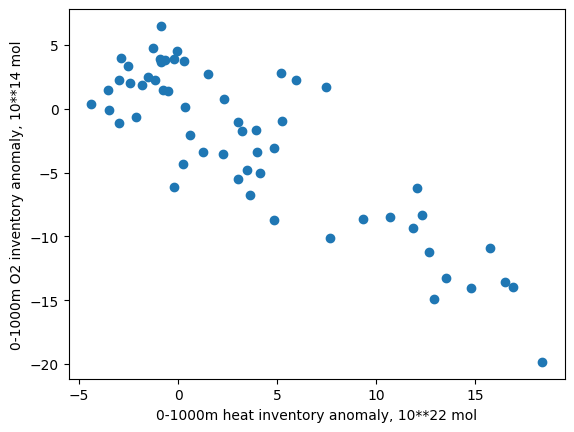

In [4]:
plt.plot(T,o2,'o')
plt.xlabel('0-1000m heat inventory anomaly, 10**22 mol')
plt.ylabel('0-1000m O2 inventory anomaly, 10**14 mol')

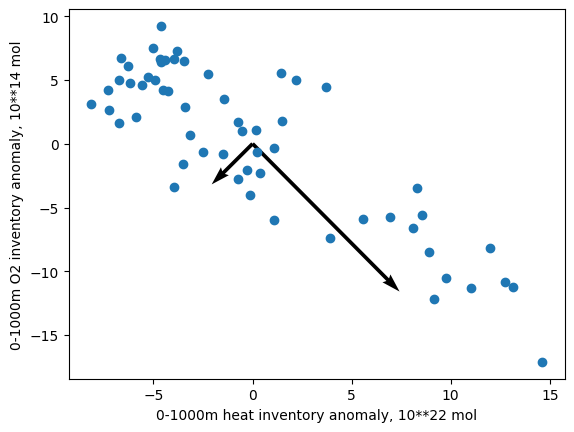

In [5]:
# calculate covariance matrix
data = np.array([T,o2],dtype=float)
C=np.cov(data)
#
# simple regression 
a = C[0,1]/C[0,0]
b = np.mean(o2)-a*np.mean(T)
#
plt.plot(T-np.mean(T),o2-np.mean(o2),'o')
plt.xlabel('0-1000m heat inventory anomaly, 10**22 mol')
plt.ylabel('0-1000m O2 inventory anomaly, 10**14 mol')
#
# eigendecomposition of C
L,U=np.linalg.eig(C)
# generate a vector plot of the eigenvector (scaled by sqrt of eigenvalues)
plt.quiver([0,0],[0,0],np.sqrt(L)*U[0,:],np.sqrt(L)*U[1,:],scale=20)

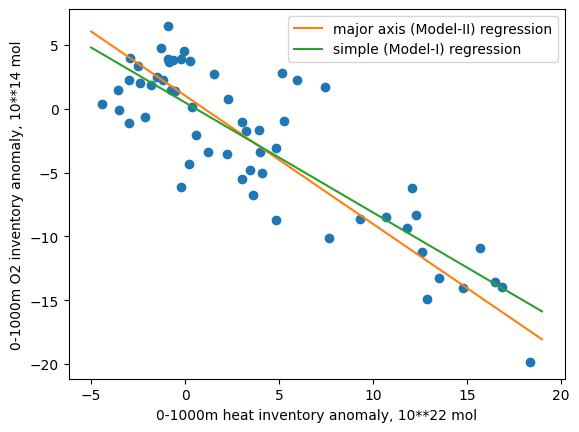

In [6]:
xT = np.arange(-5,20,1)
# plot with line fit
plt.plot(T,o2,'o')
# identify the major axis (larger eigenvalue)
ind = L==max(L)
# make the slope from the eigenvector
aMR = U[1,ind]/U[0,ind]
# calculate the intercept
bMR = np.mean(o2) - aMR*np.mean(T)
#
plt.plot(xT,aMR*xT+bMR,'-',label='major axis (Model-II) regression')
plt.plot(xT,a*xT+b,'-',label='simple (Model-I) regression')
plt.xlabel('0-1000m heat inventory anomaly, 10**22 mol')
plt.ylabel('0-1000m O2 inventory anomaly, 10**14 mol')
plt.legend()